# FACE IDENTIFICATION WHEN WEARING AND NOT WEARING A MASK

# TRAN QUANG HUY 19146195 

In [1]:
# Import Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 as cv
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
# Gọi các thư viện cần thiết 
import pandas as pd # Xu lý bảng
import seaborn as sns # Vẽ biểu đồ thị của dữ liệu
from sklearn.preprocessing import StandardScaler # Xử lý chuẩn hóa dữ liệu
from sklearn.model_selection import train_test_split # Chia dữ liệu ra làm 2 phần
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM    # LSTM  biên dạng ANN, BatchNormalization: cho nhỏ lại
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical # Sử dung để làm nổi đối tượng cần phân loại
from keras import callbacks 
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score # Để đo lường
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from tensorflow.keras.preprocessing import image
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn import preprocessing
import keras
from keras.layers import Dense # fully connected
from tensorflow.keras.optimizers import RMSprop # toi uu
from keras.callbacks import EarlyStopping # dung lai ngay lap tuc
from sklearn.preprocessing import scale # xu li du lieu

# Tạo các biến 

In [ ]:
# Important variables 
input_size = [150,150]
batch = 32

input_shape = (150,150,3)
maxpooling_size = (2,2)

# Phân chia các tập dữ liệu

# WearMask 

In [ ]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2,shear_range=0.2, zoom_range = 0.2,)    

train_dataset_wearmask = image_generator.flow_from_directory(batch_size=batch,
                                                 directory='../input/cl3dataset-final/DATASET_FINAL/DATASET_FINAL/WEARMASK',
                                                 shuffle=True,
                                                 target_size= input_size, 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset_wearmask = image_generator.flow_from_directory(batch_size=batch,
                                                 directory='../input/cl3dataset-final/DATASET_FINAL/DATASET_FINAL/WEARMASK',
                                                 shuffle=True,
                                                 target_size=input_size, 
                                                 subset="validation",
                                                 class_mode='categorical')

In [ ]:
train_dataset_wearmask.class_indices

In [ ]:
validation_dataset_wearmask.classes

# Without Mask

In [ ]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2,shear_range=0.2, zoom_range = 0.2,)    

train_dataset_withoutmask = image_generator.flow_from_directory(batch_size=batch,
                                                 directory='../input/cl3dataset-final/DATASET_FINAL/DATASET_FINAL/WITHOUT MASK',
                                                 shuffle=True,
                                                 target_size= input_size, 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset_withoutmask = image_generator.flow_from_directory(batch_size=batch,
                                                 directory='../input/cl3dataset-final/DATASET_FINAL/DATASET_FINAL/WITHOUT MASK',
                                                 shuffle=True,
                                                 target_size=input_size, 
                                                 subset="validation",
                                                 class_mode='categorical')

In [ ]:
train_dataset_withoutmask.class_indices

In [ ]:
train_dataset_withoutmask.classes

# Stranger

In [ ]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2,shear_range=0.2, zoom_range = 0.2,)    

train_dataset_stranger = image_generator.flow_from_directory(batch_size=batch,
                                                 directory='../input/cl3dataset-final/Stranger/Stranger',
                                                 shuffle=True,
                                                 target_size= input_size, 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset_stranger = image_generator.flow_from_directory(batch_size=batch,
                                                 directory='../input/cl3dataset-final/Stranger/Stranger',
                                                 shuffle=True,
                                                 target_size=input_size, 
                                                 subset="validation",
                                                 class_mode='categorical')

In [ ]:
train_dataset_stranger.class_indices

In [ ]:
train_dataset_stranger.classes

# Tạo mạng Nơ ron

# Wear mask

In [ ]:
# # from keras.layers import Conv2D, MaxPooling2D
# from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input,MaxPooling2D
# mask_model = Sequential()
# mask_model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(150,150,3)))
# #mask_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# # mask_model.add(MaxPool2D(pool_size=3, strides=2))
# mask_model.add(MaxPooling2D((2,2)))


# mask_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# #mask_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# # mask_model.add(MaxPool2D(pool_size=3, strides=2))
# mask_model.add(MaxPooling2D((2,2)))

              
# mask_model.add(Conv2D(256, kernel_size=3, activation='relu'))
# #mask_model.add(Conv2D(256, kernel_size=3, activation='relu'))
# # mask_model.add(MaxPool2D(pool_size=3, strides=2))
# mask_model.add(MaxPooling2D((2,2)))


# mask_model.add(Conv2D(512, kernel_size=3, activation='relu'))
# # mask_model.add(Conv2D(512, kernel_size=3, activation='relu'))
# # mask_model.add(MaxPool2D(pool_size=3, strides=2))
# mask_model.add(MaxPooling2D((2,2)))


# from keras.layers.convolutional import Conv2D, MaxPooling2D
# from keras.models import Sequential
# from keras.layers import Dense, Activation, Flatten

# mask_model.add(Flatten())
# mask_model.add(Dropout(0.5))
# mask_model.add(Dense(128,activation='relu'))
# mask_model.add(Dense(512, activation='relu')) 


# mask_model.add(Dense(5,activation='softmax', name ='wearmask'))

# mask_model.summary()

In [ ]:
# from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input,MaxPooling2D
mask_model = Sequential()
mask_model.add(Conv2D(128,(3,3), kernel_initializer='he_uniform',padding='same', activation='relu', input_shape=(150,150,3)))
#mask_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# mask_model.add(MaxPool2D(pool_size=3, strides=2))
mask_model.add(MaxPooling2D((2,2)))


mask_model.add(Conv2D(128,(3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
#mask_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# mask_model.add(MaxPool2D(pool_size=3, strides=2))
mask_model.add(MaxPooling2D((2,2)))

              
mask_model.add(Conv2D(256,(3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
#mask_model.add(Conv2D(256, kernel_size=3, activation='relu'))
# mask_model.add(MaxPool2D(pool_size=3, strides=2))
mask_model.add(MaxPooling2D((2,2)))


mask_model.add(Conv2D(512, (3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
# mask_model.add(Conv2D(512, kernel_size=3, activation='relu'))
# mask_model.add(MaxPool2D(pool_size=3, strides=2))
mask_model.add(MaxPooling2D((2,2)))


from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

mask_model.add(Flatten())
mask_model.add(Dropout(0.5))
mask_model.add(Dense(128,activation='relu'))
mask_model.add(Dense(512, activation='relu')) 


mask_model.add(Dense(5,activation='softmax', name ='wearmask'))

mask_model.summary()

# Without Mask

In [ ]:
# # from keras.layers import Conv2D, MaxPooling2D
# from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
# withoutmask_model = Sequential()
# withoutmask_model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(150,150,3)))
# #mask_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# # withoutmask_model.add(MaxPool2D(pool_size=3, strides=2))
# withoutmask_model.add(MaxPooling2D((2,2)))


# withoutmask_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# #mask_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# # withoutmask_model.add(MaxPool2D(pool_size=3, strides=2))
# withoutmask_model.add(MaxPooling2D((2,2)))

# withoutmask_model.add(Conv2D(256, kernel_size=3, activation='relu'))
# #mask_model.add(Conv2D(256, kernel_size=3, activation='relu'))
# # withoutmask_model.add(MaxPool2D(pool_size=3, strides=2))
# withoutmask_model.add(MaxPooling2D((2,2)))

# withoutmask_model.add(Conv2D(512, kernel_size=3, activation='relu'))
# #mask_model.add(Conv2D(512, kernel_size=3, activation='relu'))
# # withoutmask_model.add(MaxPool2D(pool_size=3, strides=2))
# withoutmask_model.add(MaxPooling2D((2,2)))


# from keras.layers.convolutional import Conv2D, MaxPooling2D
# from keras.models import Sequential
# from keras.layers import Dense, Activation, Flatten

# withoutmask_model.add(Flatten())
# withoutmask_model.add(Dropout(0.5))
# withoutmask_model.add(Dense(128,activation='relu'))
# withoutmask_model.add(Dense(512, activation='relu')) 


# withoutmask_model.add(Dense(5,activation='softmax', name ='withoutmask'))

# withoutmask_model.summary()

In [ ]:
# from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input,MaxPooling2D
withoutmask_model = Sequential()
withoutmask_model.add(Conv2D(128,(3,3), kernel_initializer='he_uniform',padding='same', activation='relu', input_shape=(150,150,3)))
#withoutmask_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# withoutmask_model.add(MaxPool2D(pool_size=3, strides=2))
withoutmask_model.add(MaxPooling2D((2,2)))

withoutmask_model.add(Conv2D(128,(3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
#mask_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# mask_model.add(MaxPool2D(pool_size=3, strides=2))
withoutmask_model.add(MaxPooling2D((2,2)))

              
withoutmask_model.add(Conv2D(256,(3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
#withoutmask_model.add(Conv2D(256, kernel_size=3, activation='relu'))
# withoutmask_model.add(MaxPool2D(pool_size=3, strides=2))
withoutmask_model.add(MaxPooling2D((2,2)))

withoutmask_model.add(Conv2D(512, (3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
# withoutmask_model.add(Conv2D(512, kernel_size=3, activation='relu'))
# withoutmask_model.add(MaxPool2D(pool_size=3, strides=2))
withoutmask_model.add(MaxPooling2D((2,2)))

from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
withoutmask_model.add(Flatten())
withoutmask_model.add(Dropout(0.5))
withoutmask_model.add(Dense(128,activation='relu'))
withoutmask_model.add(Dense(512, activation='relu')) 
withoutmask_model.add(Dense(5,activation='softmax', name ='wearmask'))

withoutmask_model.summary()

# Stranger 

In [ ]:
# from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
stranger_model = Sequential()
stranger_model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(150,150,3)))
#mask_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# stranger_model.add(MaxPool2D(pool_size=3, strides=2))
stranger_model.add(MaxPooling2D((2,2)))

stranger_model.add(Conv2D(128, kernel_size=3, activation='relu'))
#stranger_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# stranger_model.add(MaxPool2D(pool_size=3, strides=2))
stranger_model.add(MaxPooling2D((2,2)))

stranger_model.add(Conv2D(256, kernel_size=3, activation='relu'))
#stranger_model.add(Conv2D(256, kernel_size=3, activation='relu'))
# stranger_model.add(MaxPool2D(pool_size=3, strides=2))
stranger_model.add(MaxPooling2D((2,2)))

stranger_model.add(Conv2D(512, kernel_size=3, activation='relu'))
#stranger_model.add(Conv2D(512, kernel_size=3, activation='relu'))
# stranger_model.add(MaxPool2D(pool_size=3, strides=2))
stranger_model.add(MaxPooling2D((2,2)))

from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

stranger_model.add(Flatten())
stranger_model.add(Dropout(0.5))
stranger_model.add(Dense(128,activation='relu'))
stranger_model.add(Dense(512, activation='relu')) 


stranger_model.add(Dense(2,activation='softmax', name ='stranger'))

stranger_model.summary()

In [ ]:
# from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input,MaxPooling2D
stranger_model = Sequential()
stranger_model.add(Conv2D(128,(3,3), kernel_initializer='he_uniform',padding='same', activation='relu', input_shape=(150,150,3)))
#stranger_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# stranger_model.add(MaxPool2D(pool_size=3, strides=2))
stranger_model.add(MaxPooling2D((2,2)))

stranger_model.add(Conv2D(128,(3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
#stranger_model.add(Conv2D(128, kernel_size=3, activation='relu'))
#stranger_model.add(MaxPool2D(pool_size=3, strides=2))
stranger_model.add(MaxPooling2D((2,2)))

              
stranger_model.add(Conv2D(256,(3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
#stranger_model.add(Conv2D(256, kernel_size=3, activation='relu'))
# stranger_model.add(MaxPool2D(pool_size=3, strides=2))
stranger_model.add(MaxPooling2D((2,2)))

stranger_model.add(Conv2D(512, (3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
# stranger_model.add(Conv2D(512, kernel_size=3, activation='relu'))
# stranger_model.add(MaxPool2D(pool_size=3, strides=2))
stranger_model.add(MaxPooling2D((2,2)))

from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
stranger_model.add(Flatten())
stranger_model.add(Dropout(0.5))
stranger_model.add(Dense(128,activation='relu'))
stranger_model.add(Dense(512, activation='relu')) 
stranger_model.add(Dense(2,activation='softmax', name ='wearmask'))

stranger_model.summary()

# TRAIN MODEL

# MASK 

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
mask_model.compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])
history_mask=mask_model.fit(train_dataset_wearmask,batch_size=batch,epochs=50, verbose=1,validation_data=validation_dataset_wearmask)

In [ ]:
mask_model.save('Final_MaskEpochs50.h5')

# WITHOUT MASK

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
withoutmask_model.compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])
history_withoutmask=withoutmask_model.fit(train_dataset_withoutmask,batch_size=batch,epochs=50,verbose=1,validation_data=validation_dataset_withoutmask)

In [ ]:
withoutmask_model.save('Final_WithoutMaskEpochs50.h5')

# STRANGER

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
stranger_model.compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])
history_stranger=stranger_model.fit(train_dataset_stranger,batch_size=batch,epochs=50,verbose=1,validation_data=validation_dataset_stranger)

In [ ]:
stranger_model.save('Final_StrangerEpochs50.h5')

# PLOT

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
history = history_mask
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
history = history_withoutmask
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
history = history_stranger
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/demo_test/TEST (4).jpg"

model = mask_model
predict = ['BHUY_MASK',
 'DHUNG_MASK',
 'DTAI_MASK',
 'MTUAN_MASK',
 'QHUY_MASK',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/HUY_TEST/huy_mm (1)t.jpg"

model = mask_model
predict = ['BHUY_MASK',
 'DHUNG_MASK',
 'DTAI_MASK',
 'MTUAN_MASK',
 'QHUY_MASK',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/huy0906 (4).jpg"

model = withoutmask_model
predict = ['BHUY_WITHOUTMASK',
 'DHUNG_WITHOUTMASK',
 'DTAI_WITHOUTMASK',
 'MTUAN_WITHOUTMASK',
 'QHUY_WITHOUTMASK',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/demo_test/TEST (2).jpg"

model = withoutmask_model
predict = ['BHUY_WITHOUTMASK',
 'DHUNG_WITHOUTMASK',
 'DTAI_WITHOUTMASK',
 'MTUAN_WITHOUTMASK',
 'QHUY_WITHOUTMASK',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/demo_test/TEST (1).jpg"

model = withoutmask_model
predict = ['BHUY_WITHOUTMASK',
 'DHUNG_WITHOUTMASK',
 'DTAI_WITHOUTMASK',
 'MTUAN_WITHOUTMASK',
 'QHUY_WITHOUTMASK',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/QhuyMask (1).jpg"

model = mask_model
predict = ['BHUY_MASK',
 'DHUNG_MASK',
 'DTAI_MASK',
 'MTUAN_MASK',
 'QHUY_MASK',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/MTuan_Mask.jpg"

model = mask_model
predict = ['BHUY_MASK',
 'DHUNG_MASK',
 'DTAI_MASK',
 'MTUAN_MASK',
 'QHUY_MASK',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/DTai_Mask.jpg"

model = mask_model
predict = ['BHUY_MASK',
 'DHUNG_MASK',
 'DTAI_MASK',
 'MTUAN_MASK',
 'QHUY_MASK',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/hung0906 (6).jpg"

model = mask_model
predict = ['BHUY_MASK',
 'DHUNG_MASK',
 'DTAI_MASK',
 'MTUAN_MASK',
 'QHUY_MASK',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/hung0906 (8).jpg"

model = mask_model
predict = ['BHUY_MASK',
 'DHUNG_MASK',
 'DTAI_MASK',
 'MTUAN_MASK',
 'QHUY_MASK',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/hung0906 (3).jpg"

model = withoutmask_model
predict = ['BHUY_WITHOUTMASK',
 'DHUNG_WITHOUTMASK',
 'DTAI_WITHOUTMASK',
 'MTUAN_WITHOUTMASK',
 'QHUY_WITHOUTMASK',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/BHuyWithout.jpg"

model = withoutmask_model
predict = ['BHUY_WITHOUTMASK',
 'DHUNG_WITHOUTMASK',
 'DTAI_WITHOUTMASK',
 'MTUAN_WITHOUTMASK',
 'QHUY_WITHOUTMASK',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/BHuyMask.jpg"

model = mask_model
predict = ['BHUY_MASK',
 'DHUNG_MASK',
 'DTAI_MASK',
 'MTUAN_MASK',
 'QHUY_MASK',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

# 1 MODEL

In [3]:
# Important variables 
input_size = [150,150]
batch = 32

input_shape = (150,150,3)
maxpooling_size = (2,2)

In [4]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2,shear_range=0.2, zoom_range = 0.2,)    

train_dataset = image_generator.flow_from_directory(batch_size=batch,
                                                 directory='../input/cl3dataset-final/Main/Main',
                                                 shuffle=True,
                                                 target_size= input_size, 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=batch,
                                                 directory='../input/cl3dataset-final/Main/Main',
                                                 shuffle=True,
                                                 target_size=input_size, 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 3229 images belonging to 10 classes.
Found 802 images belonging to 10 classes.


In [5]:
train_dataset.class_indices

{'BHUY_MASK': 0,
 'BHUY_W': 1,
 'DHUNG_MASK': 2,
 'DHUNG_W': 3,
 'DTAI_MASK': 4,
 'DTAI_W': 5,
 'MTUAN_MASK': 6,
 'MTUAN_W': 7,
 'QHUY_MASK': 8,
 'QHUY_W': 9}

In [6]:
train_dataset.classes

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [8]:
# from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input,MaxPooling2D
model = Sequential()
model.add(Conv2D(128,(3,3), kernel_initializer='he_uniform',padding='same', activation='relu', input_shape=(150,150,3)))
#model.add(Conv2D(128, kernel_size=3, activation='relu'))
# model.add(MaxPool2D(pool_size=3, strides=2))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(128,(3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
#model.add(Conv2D(128, kernel_size=3, activation='relu'))
# model.add(MaxPool2D(pool_size=3, strides=2))
model.add(MaxPooling2D((2,2)))

              
model.add(Conv2D(256,(3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
#model.add(Conv2D(256, kernel_size=3, activation='relu'))
# model.add(MaxPool2D(pool_size=3, strides=2))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(512, (3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
# model.add(Conv2D(512, kernel_size=3, activation='relu'))
# model.add(MaxPool2D(pool_size=3, strides=2))
model.add(MaxPooling2D((2,2)))


from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(512, activation='relu')) 


model.add(Dense(10,activation='softmax', name ='wearmask'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 37, 256)       295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 18, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 512)      

In [10]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])
history=model.fit(train_dataset,batch_size=batch,epochs=50, verbose=1,validation_data=validation_dataset)

Epoch 1/50
101/101 [==============================] - 26s 252ms/step - loss: 0.5789 - accuracy: 0.8092 - val_loss: 0.9403 - val_accuracy: 0.6446
Epoch 2/50
101/101 [==============================] - 25s 247ms/step - loss: 0.3020 - accuracy: 0.9046 - val_loss: 0.7225 - val_accuracy: 0.8155
Epoch 3/50
101/101 [==============================] - 25s 248ms/step - loss: 0.1649 - accuracy: 0.9474 - val_loss: 0.5579 - val_accuracy: 0.7943
Epoch 4/50
101/101 [==============================] - 25s 247ms/step - loss: 0.1233 - accuracy: 0.9622 - val_loss: 0.5470 - val_accuracy: 0.8030
Epoch 5/50
101/101 [==============================] - 25s 248ms/step - loss: 0.1115 - accuracy: 0.9666 - val_loss: 0.6404 - val_accuracy: 0.7868
Epoch 6/50
101/101 [==============================] - 25s 248ms/step - loss: 0.0536 - accuracy: 0.9820 - val_loss: 0.3448 - val_accuracy: 0.8703
Epoch 7/50
101/101 [==============================] - 24s 242ms/step - loss: 0.0802 - accuracy: 0.9731 - val_loss: 0.8582 - val_ac

In [11]:
model.save('Final_Main10.h5')

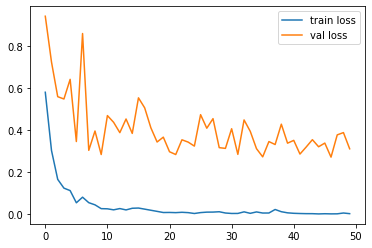

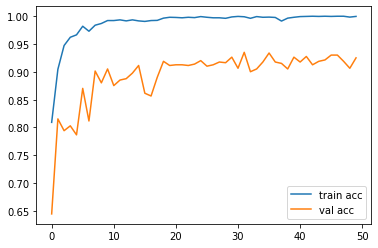

<Figure size 432x288 with 0 Axes>

In [12]:
# plot the loss
import matplotlib.pyplot as plt
history = history
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

array(['QHUY_WITHOUT'], dtype='<U13')

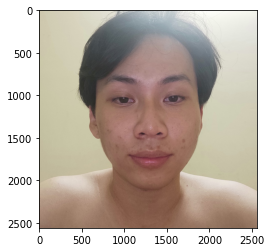

In [24]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/hung0906 (3).jpg"

model = model
predict = ['BHUY_MASK',
 'BHUY_WITHOUT',
 'DHUNG_MASK',
 'DHUNG_WITHOUT',
 'DTAI_MASK',
 'DTAI_WITHOUT',
 'MTUAN_MASK',
 'MTUAN_WITHOUT',
 'QHUY_MASK',
 'QHUY_WITHOUT']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]